In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray')

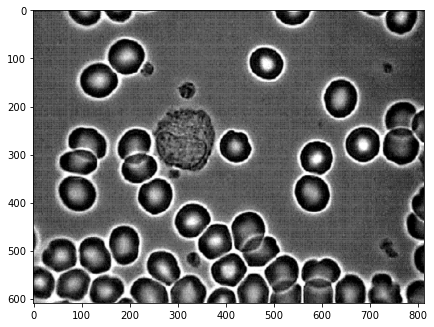

In [3]:
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

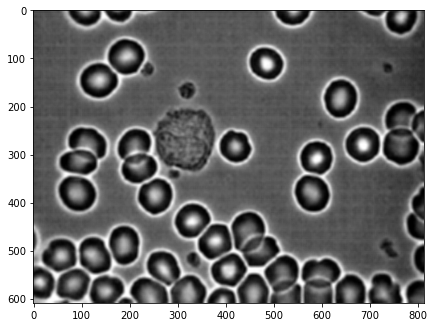

In [4]:
blur = cv2.blur(gray, (7,7))
show(blur)

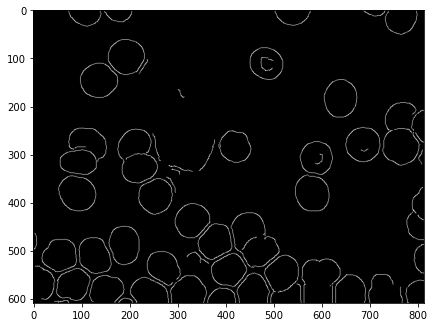

In [5]:
canny = cv2.Canny(blur, 130, 240)
show(canny)

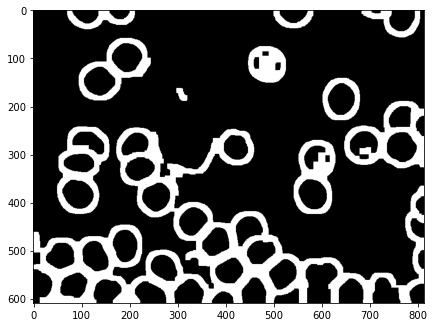

In [6]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
close = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel1, iterations=1)
dilate = cv2.morphologyEx(close, cv2.MORPH_DILATE, kernel2, iterations=3)
dilate = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel3, iterations=2)
#dilate = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel1, iterations=2)
show(dilate)

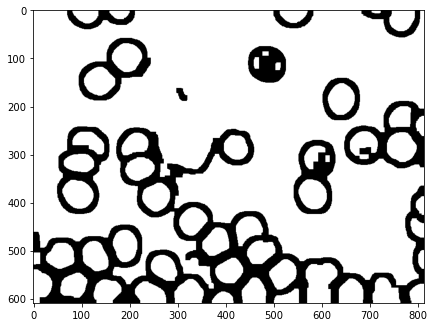

In [7]:
hpone=np.ones(dilate.shape, dtype = 'uint8')
rule = cv2.subtract(hpone, dilate)
show(rule)

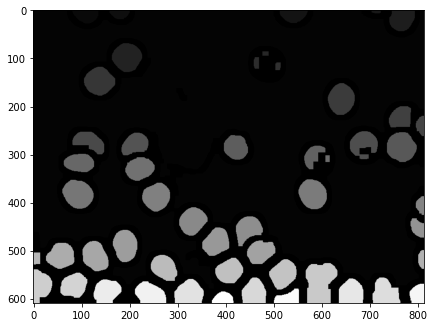

In [8]:
_, markers = cv2.connectedComponents(rule)
show(markers)

In [10]:
full = np.zeros(dilate.shape, dtype = 'uint8')

In [11]:
for n in np.unique(markers):
    if n == 0 or n ==1:
        print(n)
        continue
    else:
        full[markers == n] = 255
trim = img

0
1


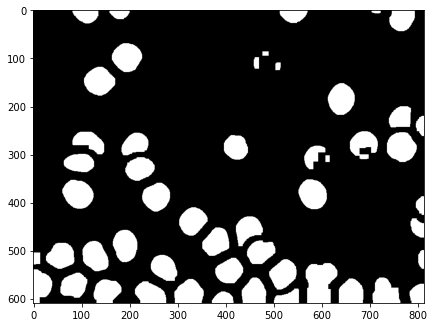

In [12]:
show(full)

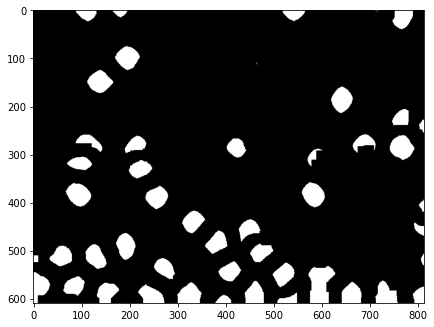

In [20]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
res = cv2.morphologyEx(full, cv2.MORPH_ERODE, kernel4, iterations=2)
show(res)

In [21]:
import imutils
cnts = cv2.findContours(res.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [22]:
len(cnts)

48

In [23]:
img[res == 255]=[255, 0, 0]

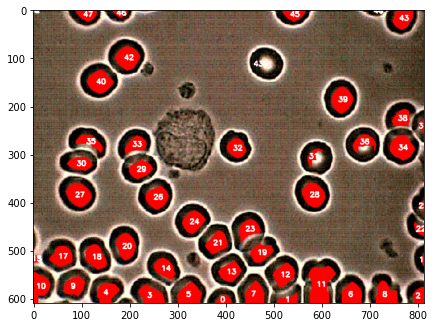

In [24]:
i = 0
for c in cnts:
    M = cv2.moments(c)
    if M["m00"] == 0:
        M["m00"] += 0.1
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    cv2.putText(img, str(i), (cX-7, cY+5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    i += 1
show(img)